In [87]:
# Dependencies
import yfinance as yf
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.dates as mdates
output_data_file = "output_data/chipstockprices.csv"
new_output_data_file = "output_data/newchipstockprices.csv"

# Pull chip stock data from yahoo finance

In [88]:
TSM = yf.Ticker("TSM")
NVDA = yf.Ticker("NVDA")
ASML = yf.Ticker("ASML")
AVGO = yf.Ticker("AVGO")
AMD = yf.Ticker("AMD")
MU = yf.Ticker("MU")
NXP = yf.Ticker("NXP")
KLA = yf.Ticker("KLA")
INTC = yf.Ticker("INTC")
QCOM = yf.Ticker("QCOM")

TSM_historical = TSM.history(start="2014-01-01", end="2021-07-01", interval="1d")
NVDA_historical = NVDA.history(start="2014-01-01", end="2021-07-01", interval="1d")
ASML_historical = ASML.history(start="2014-01-01", end="2021-07-01", interval="1d")
AVGO_historical = AVGO.history(start="2014-01-01", end="2021-07-01", interval="1d")
AMD_historical = AMD.history(start="2014-01-01", end="2021-07-01", interval="1d")
MU_historical = MU.history(start="2014-01-01", end="2021-07-01", interval="1d")
NXP_historical = NXP.history(start="2014-01-01", end="2021-07-01", interval="1d")
KLA_historical = KLA.history(start="2014-01-01", end="2021-07-01", interval="1d")
INTC_historical = INTC.history(start="2014-01-01", end="2021-07-01", interval="1d")
QCOM_historical = QCOM.history(start="2014-01-01", end="2021-07-01", interval="1d")

TSM_historical["Ticker"]="TSM"
NVDA_historical["Ticker"]="NVDA"
ASML_historical["Ticker"]="ASML"
AVGO_historical["Ticker"]="AVGO"
AMD_historical["Ticker"]="AMD"
MU_historical["Ticker"]="MU"
NXP_historical["Ticker"]="NXP"
KLA_historical["Ticker"]="KLA"
INTC_historical["Ticker"]="INTC"
QCOM_historical["Ticker"]="QCOM"

merged_df = pd.concat([TSM_historical,
                        NVDA_historical,
                        ASML_historical,
                        AVGO_historical,
                        AMD_historical,
                        MU_historical,
                        NXP_historical,
                        KLA_historical,
                        INTC_historical,
                        QCOM_historical
                        ])
merged_df

del merged_df['Dividends']
del merged_df['Stock Splits']

merged_df.reset_index()

merged_df.to_csv(output_data_file, encoding= "utf-8", index = True, header= True)
merged_df.reset_index().groupby('Ticker')['Date'].agg(['min', 'max', 'count'])
merged_df.reset_index().isnull().sum()

New_df = merged_df.reset_index()[['Date', 'Ticker', 'Close']]
# make columns names prettier
New_df.columns = ['Date', 'Ticker', 'Price']
New_df

New_df1 = New_df.pivot_table(index=['Date'], columns='Ticker', values=['Price'])
# flatten columns multi-index, `date` will become the dataframe index
New_df1.columns = [col[1] for col in New_df1.columns.values]
New_df1

New_df1.to_csv(new_output_data_file, encoding= "utf-8", index = True, header= True)

In [103]:
New_df1

,AMD,ASML,AVGO,INTC,KLA,MU,NVDA,NXP,QCOM,TSM
Date,,,,,,,,,,
2014-01-02,3.950000,85.619240,42.849556,20.957815,46.770000,21.660000,3.747001,9.572873,57.903431,13.512931
2014-01-03,4.000000,85.322601,43.012318,20.949682,46.209999,20.969999,3.702113,9.640128,57.563843,13.355348
2014-01-06,4.130000,83.570534,42.719330,20.689642,46.549999,20.670000,3.751726,9.707387,57.413788,13.315948
2014-01-07,4.180000,82.866005,43.126259,20.795280,45.669998,21.730000,3.813152,9.752225,57.840237,13.323831
2014-01-08,4.180000,83.088486,43.769196,20.665264,45.610001,23.870001,3.865128,9.834428,58.187744,13.465654
...,...,...,...,...,...,...,...,...,...,...
2021-06-24,86.099998,695.000000,470.059998,56.070000,NaN,80.580002,192.054993,18.462933,137.919998,117.239998
2021-06-25,85.620003,686.210022,462.200012,55.910000,NaN,82.029999,190.309998,18.442982,137.649994,116.529999
2021-06-28,87.080002,704.109985,472.799988,57.480000,NaN,83.379997,199.850006,18.353210,139.720001,119.610001


## PULL AND CLEAN UP CHIP STOCK DATA

In [89]:
#pull chip stock data
chipstock_df = pd.read_csv("output_data/chipstockprices.csv")
Chip_New_df = chipstock_df.reset_index()[['Date', 'Ticker', 'Close']]
Chip_New_df.columns = ['Date', 'Ticker', 'Price']
Chip_New_df.head()

,Date,Ticker,Price
0,2014-01-02,TSM,13.512931
1,2014-01-03,TSM,13.355348
2,2014-01-06,TSM,13.315948
3,2014-01-07,TSM,13.323831
4,2014-01-08,TSM,13.465654


## PULL AND CLEAN UP CAR STOCK DATA

In [90]:
#pull car stock data
carstock_df = pd.read_csv("output_data/carstockprices.csv")
new_carstock_df = carstock_df.reset_index()[['Date', 'Ticker', 'Close']]
new_carstock_df.columns = ['Date', 'Ticker', 'Price']
new_carstock_df.head()

,Date,Ticker,Price
0,2014-01-02,F,10.945109
1,2014-01-03,F,10.994732
2,2014-01-06,F,11.044353
3,2014-01-07,F,10.902575
4,2014-01-08,F,11.015998


# Overview of chip stocks

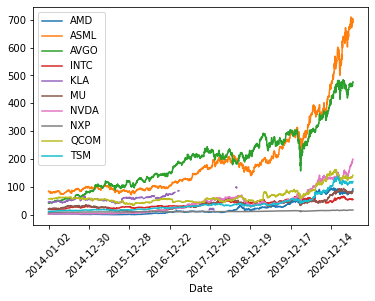

In [91]:
#Overview of chip stock
Chip_New_df1 = Chip_New_df.pivot_table(index=['Date'], columns='Ticker', values=['Price'])
# flatten columns multi-index, `date` will become the dataframe index
Chip_New_df1.columns = [col[1] for col in Chip_New_df1.columns.values]
Chip_New_df1.plot()
plt.xticks(rotation = 45)
plt.savefig("output_data/semiconductor_shortage_visuals/ChipStocks.png")

# Overview of car stocks

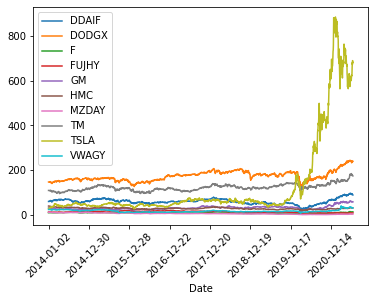

In [92]:
#Overview of car stock
new_carstock_df1 = new_carstock_df.pivot_table(index=['Date'], columns='Ticker', values=['Price'])
# flatten columns multi-index, `date` will become the dataframe index
new_carstock_df1.columns = [col[1] for col in new_carstock_df1.columns.values]
new_carstock_df1.plot()
plt.xticks(rotation = 45)
plt.savefig("output_data/semiconductor_shortage_visuals/CarStocks.png")

## SELECT SAMPLE CHIP COMPANY (TSM)

Compare with 10 car companies and see if there's correlations between chip stock and car stock

        Tesla	=	TSLA
        Toyota 	=	TM
        Ford 	=	F
        General Motors	=	GM
        Honda 	=	HMC
        Daimler	=	DDAIF
        Volkswagen 	=	VWAGY
        Subaru 	=	FUJHY
        Mazda 	=	MZDAY
        Dodge	=	DODGX
        
        
        
        
        
        
        
        
        
        
---------------------------------------------------------------------------------------------------------     

# Comparison#1
TSM vs Tesla

The r-squared is: 0.890545356406427


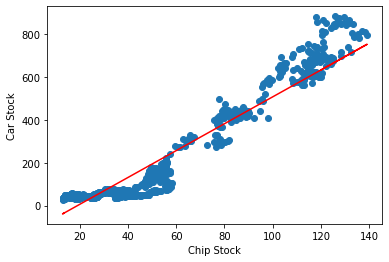

In [93]:
tsm_df = Chip_New_df.loc[Chip_New_df["Ticker"]=="TSM"]
tsm_df.dropna()
#tsm_df["Pct Chg"] = tsm_df["Price"].pct_change() 
tsm_df.head()

tsla_df = new_carstock_df.loc[new_carstock_df["Ticker"]=="TSLA"]
tsla_df.dropna()
#tsla_df["Pct Chg"] = tsla_df["Price"].pct_change() 
tsla_df.head()

merged_df1 = pd.merge(tsm_df,tsla_df, on = "Date", how = 'inner')
merged_df1.head()

x_values = merged_df1['Price_x']
y_values = merged_df1['Price_y']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Chip Stock')
plt.ylabel('Car Stock')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/semiconductor_shortage_visuals/TSM_vs_Tesla.png")
plt.show()

# Comparison#2

TMS vs Toyota

The r-squared is: 0.6287499459133932


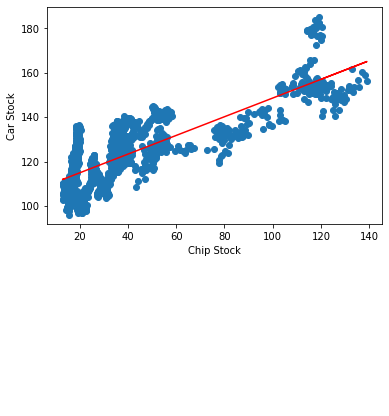

In [94]:
tm_df = new_carstock_df.loc[new_carstock_df["Ticker"]=="TM"]
tm_df.dropna()
tm_df.head()

merged_df2 = pd.merge(tsm_df,tm_df, on = "Date", how = 'inner')
merged_df2.head()

x_values = merged_df2['Price_x']
y_values = merged_df2['Price_y']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Chip Stock')
plt.ylabel('Car Stock')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/semiconductor_shortage_visuals/TSM_vs_Toyota.png")
plt.show()

# Comparison#3

TMS vs Ford

The r-squared is: 0.009412904479833707


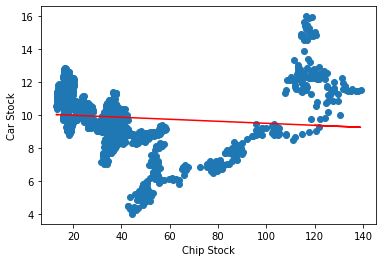

In [95]:
f_df = new_carstock_df.loc[new_carstock_df["Ticker"]=="F"]
f_df.dropna()
f_df.head()

merged_df3 = pd.merge(tsm_df,f_df, on = "Date", how = 'inner')
merged_df3.head()

x_values = merged_df3['Price_x']
y_values = merged_df3['Price_y']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Chip Stock')
plt.ylabel('Car Stock')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/semiconductor_shortage_visuals/TSM_vs_Ford.png")
plt.show()

# Comparison#4

TSM vs General Motor

The r-squared is: 0.6049979235526763


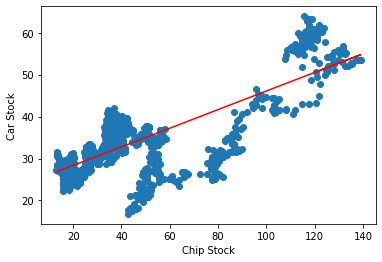

In [96]:
gm_df = new_carstock_df.loc[new_carstock_df["Ticker"]=="GM"]
gm_df.dropna()
gm_df.head()

merged_df4 = pd.merge(tsm_df,gm_df, on = "Date", how = 'inner')
merged_df4.head()

x_values = merged_df4['Price_x']
y_values = merged_df4['Price_y']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Chip Stock')
plt.ylabel('Car Stock')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/semiconductor_shortage_visuals/TSM_vs_GeneralMotor.png")
plt.show()

# Comparison#5

TSM vs Honda

The r-squared is: 0.10347616801682577


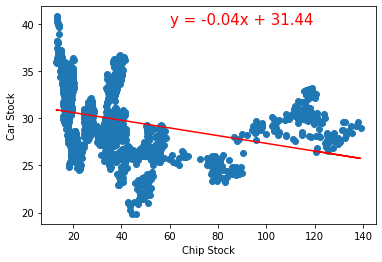

In [97]:
hmc_df = new_carstock_df.loc[new_carstock_df["Ticker"]=="HMC"]
hmc_df.dropna()
hmc_df.head()

merged_df5 = pd.merge(tsm_df,hmc_df, on = "Date", how = 'inner')
merged_df5.head()

x_values = merged_df5['Price_x']
y_values = merged_df5['Price_y']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,40),fontsize=15,color="red")
plt.xlabel('Chip Stock')
plt.ylabel('Car Stock')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/semiconductor_shortage_visuals/TSM_vs_Honda.png")
plt.show()

# Comparison#6

TSM vs Dialmer

The r-squared is: 0.04867334305069692


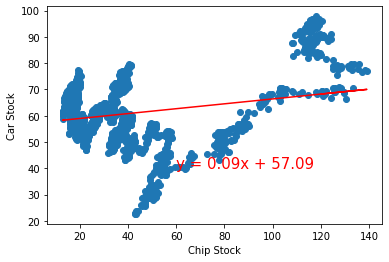

In [98]:
ddaif_df = new_carstock_df.loc[new_carstock_df["Ticker"]=="DDAIF"]
ddaif_df.dropna()
ddaif_df.head()

merged_df6 = pd.merge(tsm_df,ddaif_df, on = "Date", how = 'inner')
merged_df6.head()

x_values = merged_df6['Price_x']
y_values = merged_df6['Price_y']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,40),fontsize=15,color="red")
plt.xlabel('Chip Stock')
plt.ylabel('Car Stock')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/semiconductor_shortage_visuals/TSM_vs_Daimler.png")
plt.show()

# Comparison#7

TSM vs Volkswagen 

The r-squared is: 0.14197780868869533


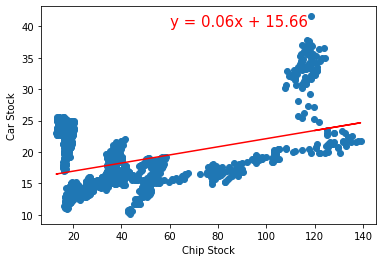

In [99]:
vwagy_df = new_carstock_df.loc[new_carstock_df["Ticker"]=="VWAGY"]
vwagy_df.dropna()
vwagy_df.head()

merged_df7 = pd.merge(tsm_df,vwagy_df, on = "Date", how = 'inner')
merged_df7.head()

x_values = merged_df7['Price_x']
y_values = merged_df7['Price_y']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,40),fontsize=15,color="red")
plt.xlabel('Chip Stock')
plt.ylabel('Car Stock')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/semiconductor_shortage_visuals/TSM_vs_VW.png")
plt.show()

# Comparison#8

TSM vs Subaru 

The r-squared is: 0.47511070178060133


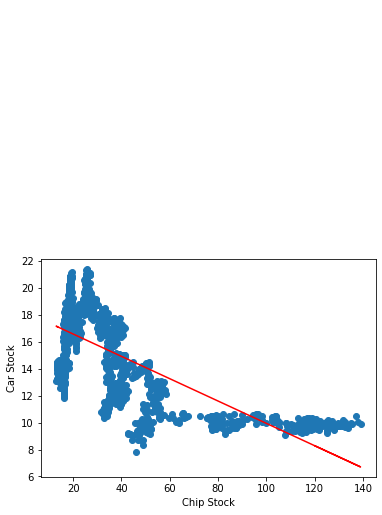

In [100]:
fujhy_df = new_carstock_df.loc[new_carstock_df["Ticker"]=="FUJHY"]
fujhy_df.dropna()
fujhy_df.head()

merged_df8 = pd.merge(tsm_df,fujhy_df, on = "Date", how = 'inner')
merged_df8.head()

x_values = merged_df8['Price_x']
y_values = merged_df8['Price_y']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,40),fontsize=15,color="red")
plt.xlabel('Chip Stock')
plt.ylabel('Car Stock')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/semiconductor_shortage_visuals/TSM_vs_Subaru.png")
plt.show()

# Comparison#9

TSM vs Mazda 

The r-squared is: 0.5171785463693513


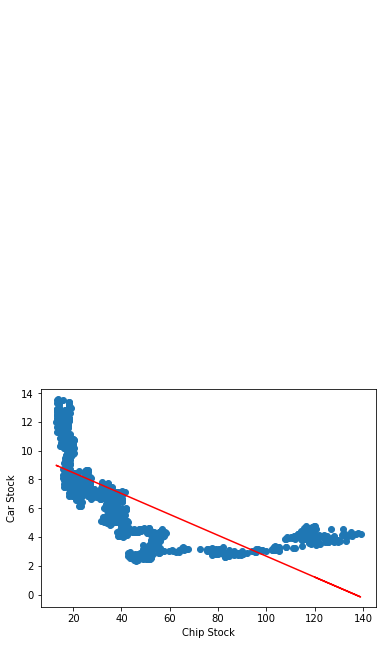

In [101]:
mzday_df = new_carstock_df.loc[new_carstock_df["Ticker"]=="MZDAY"]
mzday_df.dropna()
mzday_df.head()

merged_df9 = pd.merge(tsm_df,mzday_df, on = "Date", how = 'inner')
merged_df9.head()

x_values = merged_df9['Price_x']
y_values = merged_df9['Price_y']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,40),fontsize=15,color="red")
plt.xlabel('Chip Stock')
plt.ylabel('Car Stock')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/semiconductor_shortage_visuals/TSM_vs_Mazda.png")
plt.show()

# Comparison#10

TSM vs Dodge

The r-squared is: 0.4294220274332128


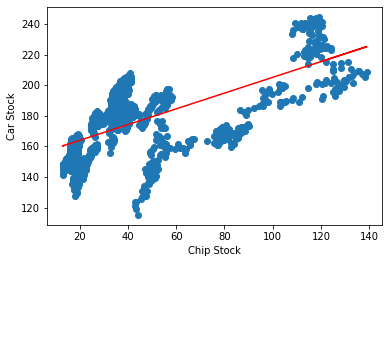

In [102]:
dodgx_df = new_carstock_df.loc[new_carstock_df["Ticker"]=="DODGX"]
dodgx_df.dropna()
dodgx_df.head()

merged_df10 = pd.merge(tsm_df,dodgx_df, on = "Date", how = 'inner')
merged_df10.head()

x_values = merged_df10['Price_x']
y_values = merged_df10['Price_y']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,40),fontsize=15,color="red")
plt.xlabel('Chip Stock')
plt.ylabel('Car Stock')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/semiconductor_shortage_visuals/TSM_vs_Dodge.png")
plt.show()

# Conclusion:

Hypothesis: Due to the recent chip shortages, we are curious to find out if there is a correlation between the largest chip stock and car stocks

Results: 

TSM vs Tesla	            The r-squared is: 0.890545356406427	 <br>
TSM vs Toyota 	        The r-squared is: 0.6287499459133932	<br>
TSM vs Ford 	            The r-squared is: 0.009412904479833707	<br>
TSM vs General Motors	The r-squared is: 0.6049979235526763	<br>
TSM vs Honda 	        The r-squared is: 0.10347616801682577	<br>
TSM vs Daimler	        The r-squared is: 0.04867334305069692	<br>
TSM vs Volkswagen 	    The r-squared is: 0.14197780868869533	<br>
TSM vs Subaru 	        The r-squared is: 0.47511070178060133	<br>
TSM vs Mazda 	        The r-squared is: 0.5171785463693513	<br>
TSM vs Dodge	            The r-squared is: 0.4294220274332128	<br>


While some comparisons show correlations between chip stock and car stock, we do not have enough evidence to say that all chip stock and car stock are correlated
